# Fire Incidents Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fire = pd.read_csv('Fire_Incidents.csv')

C:\Users\Chinmay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,12,13,20,38,45,46,55,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Dropping off columns that are not neccesary for the classification

In [3]:
#Estimated Property Loss,Estimated Contents Loss,Action Taken Secondary,Ignition Cause
f= fire.drop(columns=['point', 'Supervisor District','neighborhood_district','Incident Number','Supervisor District','ID','Property Use','Automatic Extinguishing Sytem Type'
                  ,'Estimated Contents Loss','Detector Alerted Occupants','Number of floors with extreme damage','Action Taken Other','Detector Type','Detector Operation' 
                    ,'Call Number','Station Area','Box','Estimated Property Loss','Mutual Aid','Action Taken Secondary','Ignition Factor Primary','Ignition Factor Secondary','Heat Source','Item First Ignited'
                      ,'Human Factors Associated with Ignition','Structure Type','Structure Status','Floor of Fire Origin','Fire Spread'
                      ,'No Flame Spead','Detector Effectiveness','Automatic Extinguishing Sytem Type','Automatic Extinguishing Sytem Perfomance','Automatic Extinguishing Sytem Failure Reason'
                     
                     
                     
                     ])

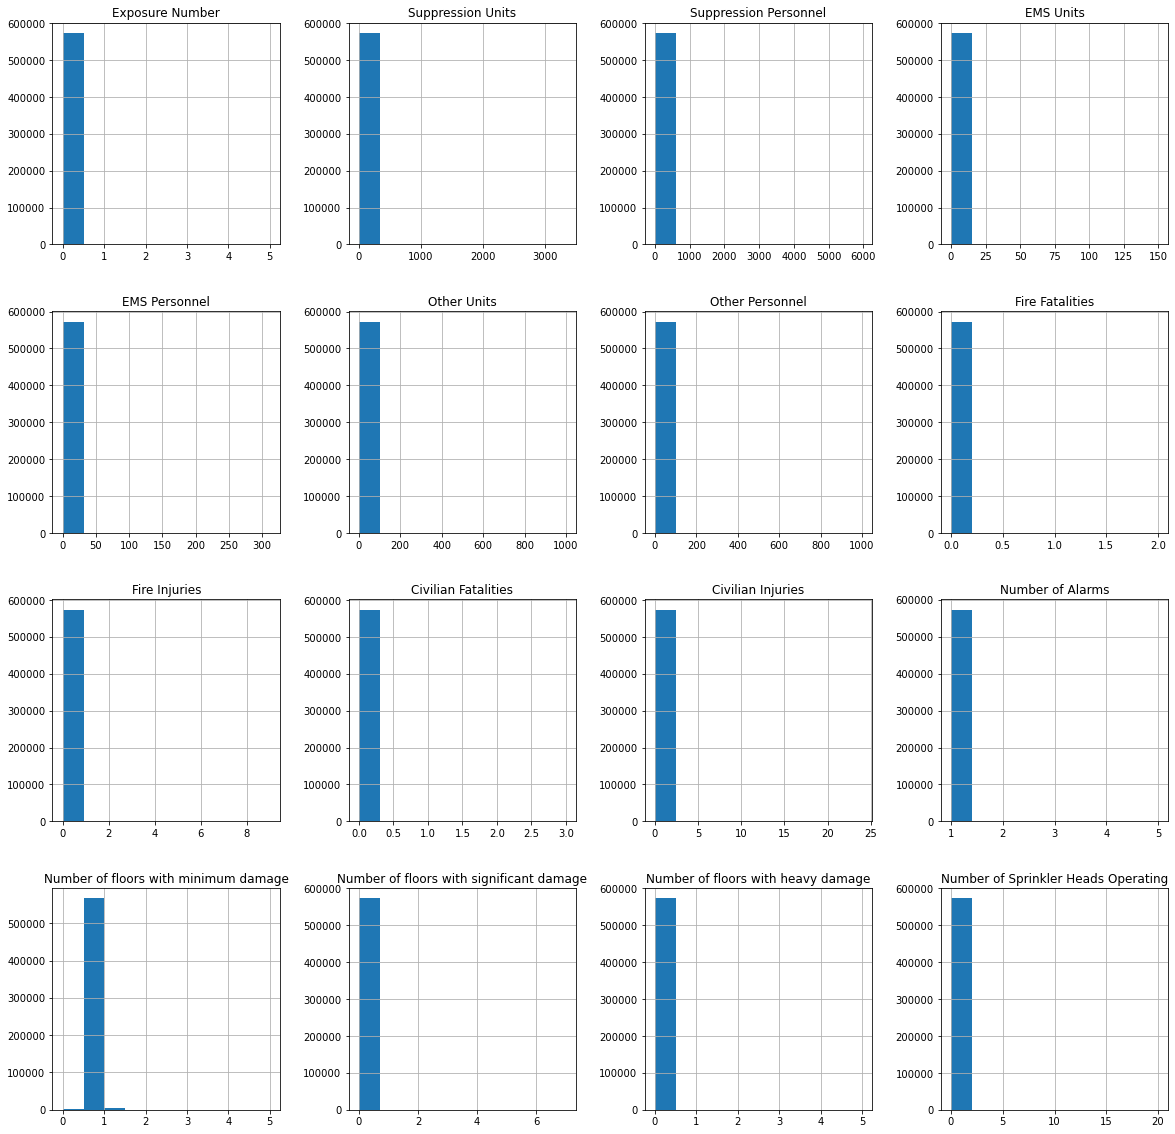

In [78]:
plt.rcParams["figure.figsize"] = (20,20)
f.hist()
plt.show()

### Getting the Numerical and Categorical Columns from the dataset

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


#imputer = SimpleImputer(strategy='median', 
                      #  missing_values=np.nan)
#imputer = imputer.fit(f)
#f.iloc[:,:] = imputer.transform(f)
#f

numeric_cols = f.select_dtypes(include=np.number).columns.tolist()
categorical_cols = f.select_dtypes('object').columns.tolist()
print(numeric_cols)
print(categorical_cols)

['Exposure Number', 'Suppression Units', 'Suppression Personnel', 'EMS Units', 'EMS Personnel', 'Other Units', 'Other Personnel', 'Fire Fatalities', 'Fire Injuries', 'Civilian Fatalities', 'Civilian Injuries', 'Number of Alarms', 'Number of floors with minimum damage', 'Number of floors with significant damage', 'Number of floors with heavy damage', 'Number of Sprinkler Heads Operating']
['Address', 'Incident Date', 'Alarm DtTm', 'Arrival DtTm', 'Close DtTm', 'City', 'zipcode', 'Battalion', 'First Unit On Scene', 'Primary Situation', 'Action Taken Primary', 'Area of Fire Origin', 'Ignition Cause', 'Detectors Present', 'Detector Failure Reason', 'Automatic Extinguishing System Present']


Due do some values there were errors which were resolved by using the Simpleimputer

In [6]:
imputer = SimpleImputer(strategy ='mean')
imputer.fit(f[numeric_cols])
f[numeric_cols]=imputer.transform(f[numeric_cols])


In [7]:
def impute_nan_create_category(f,categorical_cols):
     f[categorical_cols] = np.where(f[categorical_cols].isnull(),"Unknown",f[categorical_cols])
## Call function to create new category for variables
for Columns in [categorical_cols]:
    impute_nan_create_category(f,Columns)

Because it is important to do it even if you think you dont have to.

In [8]:
f.select_dtypes(['float','integer']).describe().round(0)

,Exposure Number,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Number of Alarms,Number of floors with minimum damage,Number of floors with significant damage,Number of floors with heavy damage,Number of Sprinkler Heads Operating
count,572884.0,572884.0,572884.0,572884.0,572884.0,572884.0,572884.0,572884.0,572884.0,572884.0,572884.0,572884.0,572884.0,572884.0,572884.0,572884.0
mean,0.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
std,0.0,8.0,21.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
50%,0.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
75%,0.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
max,5.0,3333.0,5960.0,150.0,312.0,1000.0,1000.0,2.0,9.0,3.0,24.0,5.0,5.0,7.0,5.0,20.0


Fire Fatalities on histogram. Almost entire column has false as the value.

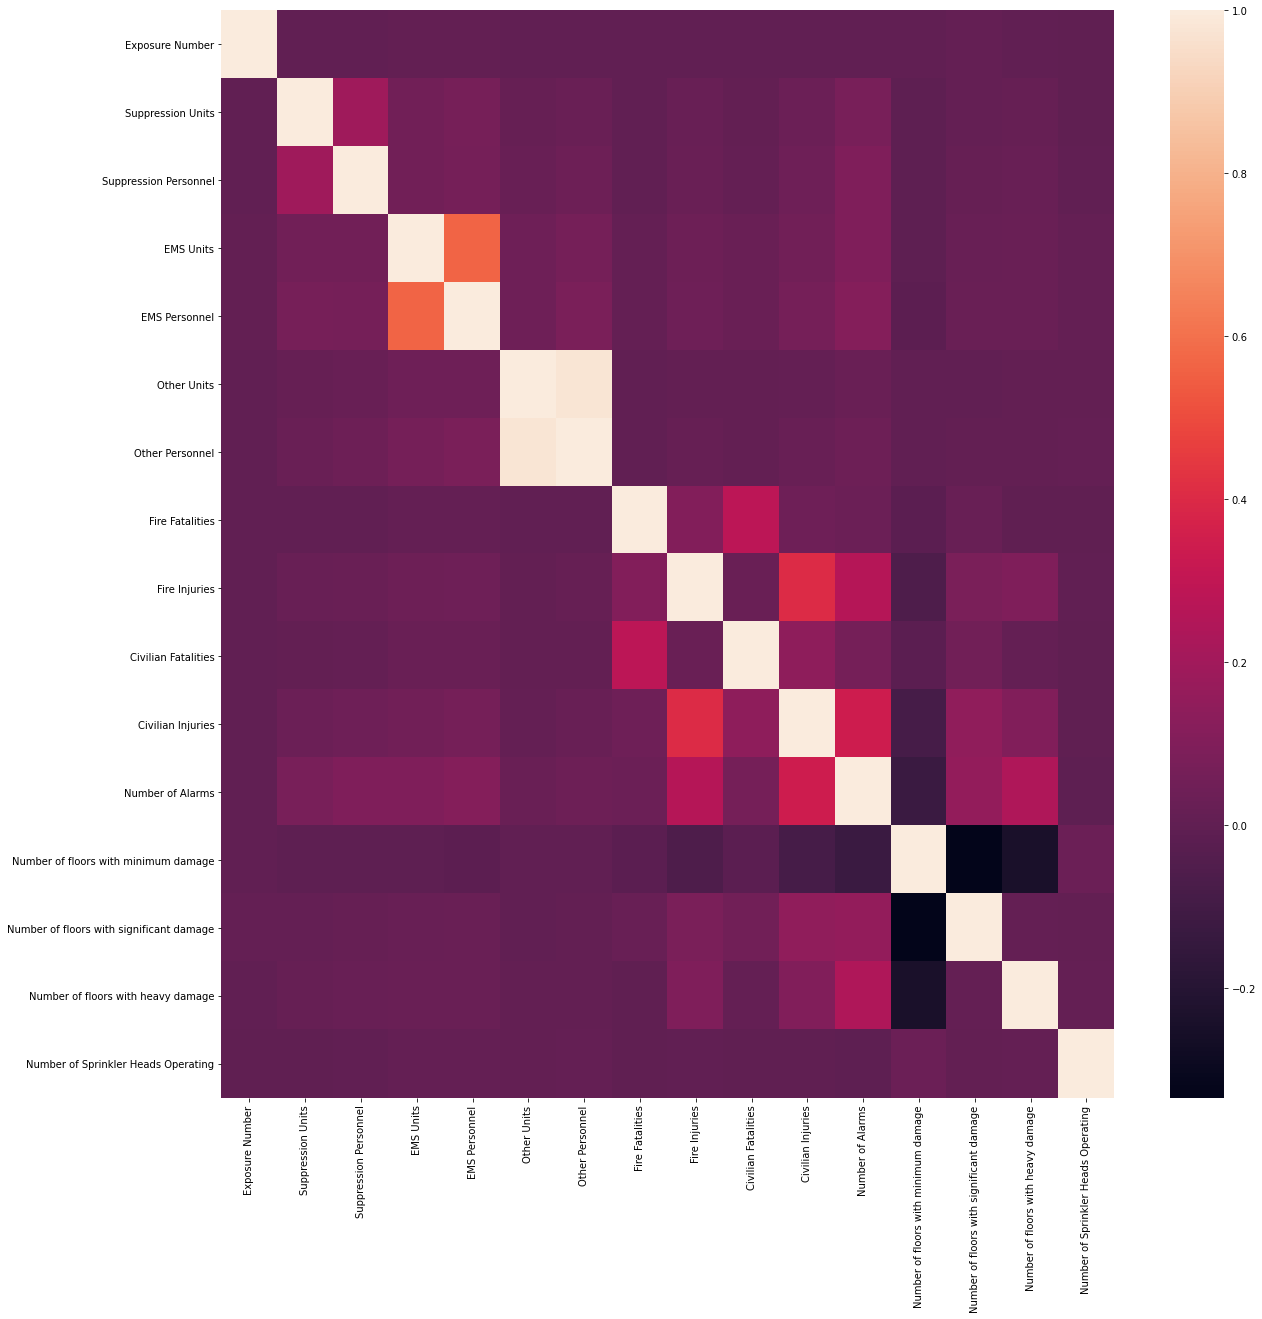

In [79]:
import seaborn as sns

sns.heatmap(f.corr())
plt.show()

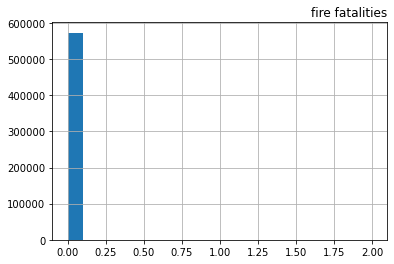

In [25]:
f['Fire Fatalities'].hist(bins=20)
plt.title('fire fatalities', loc='right')
plt.show()

### There were not many duplicates only 7-10 which are nothing considering the huge 6 lakh rows dataset

In [10]:
f1=f.drop_duplicates()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# Had to carry this out due to the erro that was face if not done. Found the code from StackOverflow
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
f1 = f1.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [39]:
num_var= ['Exposure Number', 'Suppression Units', 'Suppression Personnel', 'EMS Units', 'EMS Personnel', 'Other Units', 'Other Personnel', 'Fire Fatalities', 'Fire Injuries', 'Civilian Fatalities', 'Civilian Injuries', 'Number of Alarms', 'Number of floors with minimum damage', 'Number of floors with significant damage', 'Number of floors with heavy damage', 'Number of Sprinkler Heads Operating']

cat_var= ['Address', 'Incident Date', 'Alarm DtTm', 'Arrival DtTm', 'Close DtTm', 'City', 'zipcode', 'Battalion', 'First Unit On Scene', 'Primary Situation', 'Action Taken Primary', 'Area of Fire Origin', 'Ignition Cause', 'Detectors Present', 'Detector Failure Reason', 'Automatic Extinguishing System Present']

In [53]:
# x and y 
x=f1
y=f1['Fire Fatalities']

In [54]:
#cat_vars = ['Address', 'Incident Date', 'Alarm DtTm', 'Arrival DtTm', 'Close DtTm', 'City', 'zipcode', 'Battalion', 'First Unit On Scene', 'Primary Situation', 'Action Taken Primary', 'Area of Fire Origin', 'Ignition Cause', 'Detectors Present', 'Detector Failure Reason', 'Automatic Extinguishing System Present']
#num_vars = ['Exposure Number', 'Suppression Units', 'Suppression Personnel', 'EMS Units', 'EMS Personnel', 'Other Units', 'Other Personnel', 'Fire Fatalities', 'Fire Injuries', 'Civilian Fatalities', 'Civilian Injuries', 'Number of Alarms', 'Number of floors with minimum damage', 'Number of floors with significant damage', 'Number of floors with heavy damage', 'Number of Sprinkler Heads Operating']

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_vars),
        ("cat", categorical_transformer, cat_vars),
    ]
)

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 30)

print(f'Training samples: {x_train.shape[0]:,}')
print(f'Test samples: {x_test.shape[0]:,}')

Training samples: 458,300
Test samples: 114,576


In [56]:
numeric_transformer =Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())])
processing_pipeline = ColumnTransformer(
                      transformers=[(
                      "cat", categorical_transformer, cat_var),
                      ("num", numeric_transformer, num_var)])
processing_pipeline


ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['Address', 'Incident Date', 'Alarm DtTm',
                                  'Arrival DtTm', 'Close DtTm', 'City',
                                  'zipcode', 'Battalion', 'First Unit On Scene',
                                  'Primary Situation', 'Action Taken Primary',
                                  'Area of Fire Origin', 'Ignition Cause',
                                  'Detectors Present',
                                  'Detect...
                                                 ('scaler', StandardScaler())]),
                                 ['Exposure Number', 'Suppression Units',
                                  'Suppression Personnel', 'EMS Units',
                

In [57]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np

In [74]:
#From: https://machinelearningmastery.com/adaboost-ensemble-in-python/

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

X, y = make_classification(n_samples=500000, n_features=20, n_informative=15, n_redundant=5, random_state=6)

model = AdaBoostClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.793 (0.002)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

nb_m = modeling_pipeline = Pipeline([('model', MultinomialNB())])


param_grid = [
  {'model__alpha': [1]}
 ]

nb_results = GridSearchCV(estimator=nb_m, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
nb_results = nb_results.fit(dX_train, dy_train)